In [1]:
from subprocess import check_output
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

**Create dataframes for train and test datasets**

In [2]:
train_df = pd.read_csv('D:/DATA_SCIENCE_NIT/Fashion/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('D:/DATA_SCIENCE_NIT/Fashion/fashion-mnist_test.csv', sep = ',')

Let us explore the train and test data

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now it is observed that the first column is the label data and because it has 10 classes so it is going to have from 0 to 9.The remaining columns are the actual pixel data.Here as you can see there are about 784 columns that contain pixel data.
Here each row is a different image representation in the form pixel data.

Now let us split the train data into x and y arrays where x represents the image data and y represents the labels.

To do that we need to convert the dataframes into numpy arrays of float32 type which is the acceptable form for tensorflow and keras.

In [5]:
train_data = np.array(train_df, dtype = 'float32')

Similarly let us do the same process for test data

In [6]:
test_data = np.array(test_df, dtype='float32')

Now let us slice the train arrays into x and y arrays namely x_train,y_train to store all image data and label data respectively.
i.e 

- x_train contains all the rows and all columns except the label column and excluding header info .
- y_train contains all the rows and first column and excluding header info .


Similarly slice the test arrays into x and y arrays namely x_train,y_train to store all image data and label data respectively.
i.e 

- x_test contains all the rows and all columns except the label column and excluding header info .
- y_test contains all the rows and first column and excluding header info .

####  Important Note : Since the image data in x_train and x_test is from 0 to 255 ,  we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255 . It's important that the training set and the testing set be preprocessed in the same way:

In [7]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

In [8]:
np.shape(y_test)

(10000,)

In [9]:
np.shape(x_test)

(10000, 784)

In [10]:
np.shape(y_train)

(60000,)

In [11]:
np.shape(x_train)

(60000, 784)

Now we are gonna split the training data into validation and actual training data for training the model and testing it using the validation set. This is achieved using the train_test_split method of scikit learn library.

In [12]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

Now let us visualise the some samples after the resize of the data which needs to be ready for train the network .


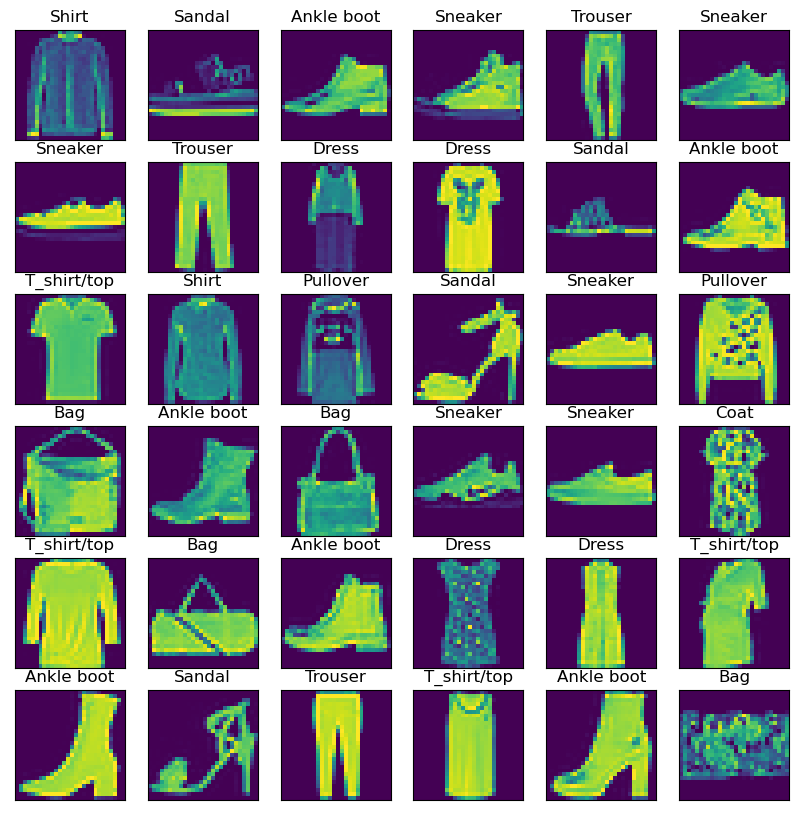

In [13]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

Labels
Each training and test example is assigned to one of the following labels as shown below:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

I think the best way is to visualise the above 10 types of classes to get a feel of what these items look like :) .So let us visualise


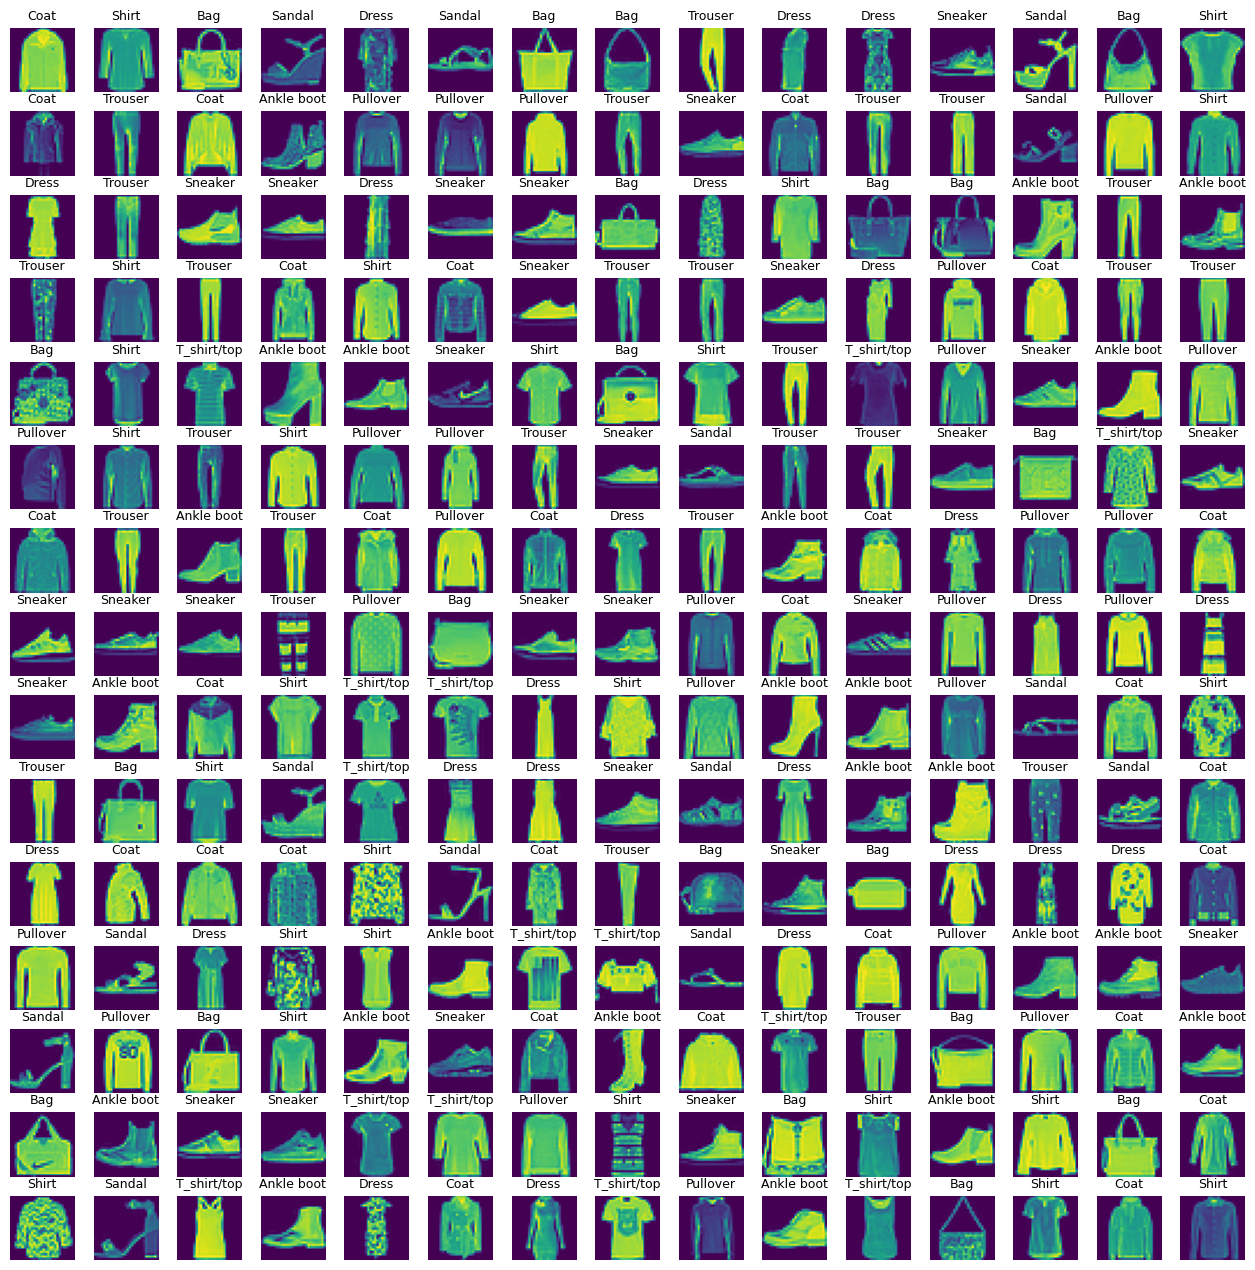

In [14]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_data) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_data[index,1:].reshape((28,28)) )
    labelindex = int(train_data[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

As you can observe above the shape of shoe from the sample image

### Create the Convolutional Neural Networks (CNN)

#### Define model

#### Compile model

#### Train model

First of all let us define the shape of the image before we define the model. Defined the shape of the image as 3d with rows and columns and 1 for the 3d visualisation


In [15]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

Now we need to do more formating on the x_train,x_test and x_validate sets.

In [16]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

#### Define the model 

The first layer in model network, keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). This layer unstacks rows of pixels in the image and lining them up and has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 32 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

In [17]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

#### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.Here we will use "sparse_categorical_crossentropy"
* Optimizer —This is how the model is updated based on the data it sees and its loss function.
* Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [18]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

#### Train Model:
Training the neural network model requires the following steps:

* Feed the training data to the model. In this example, the training data is in the x_train and y_train arrays.
* The model learns to associate images and labels.
* You ask the model to make predictions about a test set—in this example, the x_test array. Verify that the predictions match the labels from the y_test array.

To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [19]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=65,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/65
12/12 [==============================] - 30s 2s/step - loss: 1.6723 - accuracy: 0.4610 - val_loss: 1.0528 - val_accuracy: 0.6805
Epoch 2/65
12/12 [==============================] - 20s 2s/step - loss: 0.8393 - accuracy: 0.7226 - val_loss: 0.6716 - val_accuracy: 0.7681
Epoch 3/65
12/12 [==============================] - 18s 2s/step - loss: 0.6240 - accuracy: 0.7805 - val_loss: 0.5690 - val_accuracy: 0.7936
Epoch 4/65
12/12 [==============================] - 17s 1s/step - loss: 0.5447 - accuracy: 0.8074 - val_loss: 0.5093 - val_accuracy: 0.8201
Epoch 5/65
12/12 [==============================] - 17s 1s/step - loss: 0.4996 - accuracy: 0.8248 - val_loss: 0.4736 - val_accuracy: 0.8349
Epoch 6/65
12/12 [==============================] - 17s 1s/step - loss: 0.4719 - accuracy: 0.8333 - val_loss: 0.4496 - val_accuracy: 0.8445
Epoch 7/65
12/12 [==============================] - 17s 1s/step - loss: 0.4502 - accuracy: 0.8433 - val_loss: 0.4323 - val_accuracy: 0.8494
Epoch 8/65
12/12 [==

12/12 [==============================] - 17s 1s/step - loss: 0.2606 - accuracy: 0.9077 - val_loss: 0.2759 - val_accuracy: 0.9018
Epoch 60/65
12/12 [==============================] - 17s 1s/step - loss: 0.2591 - accuracy: 0.9075 - val_loss: 0.2691 - val_accuracy: 0.9054
Epoch 61/65
12/12 [==============================] - 17s 1s/step - loss: 0.2559 - accuracy: 0.9101 - val_loss: 0.2701 - val_accuracy: 0.9045
Epoch 62/65
12/12 [==============================] - 18s 1s/step - loss: 0.2513 - accuracy: 0.9107 - val_loss: 0.2700 - val_accuracy: 0.9040
Epoch 63/65
12/12 [==============================] - 17s 1s/step - loss: 0.2509 - accuracy: 0.9106 - val_loss: 0.2690 - val_accuracy: 0.9049
Epoch 64/65
12/12 [==============================] - 17s 1s/step - loss: 0.2497 - accuracy: 0.9124 - val_loss: 0.2680 - val_accuracy: 0.9053
Epoch 65/65
12/12 [==============================] - 17s 1s/step - loss: 0.2497 - accuracy: 0.9118 - val_loss: 0.2656 - val_accuracy: 0.9067


Let us plot the Training Accuracy vs Loss to get a better understanding of the model training.

Text(0.5, 1.0, 'Train - Accuracy')

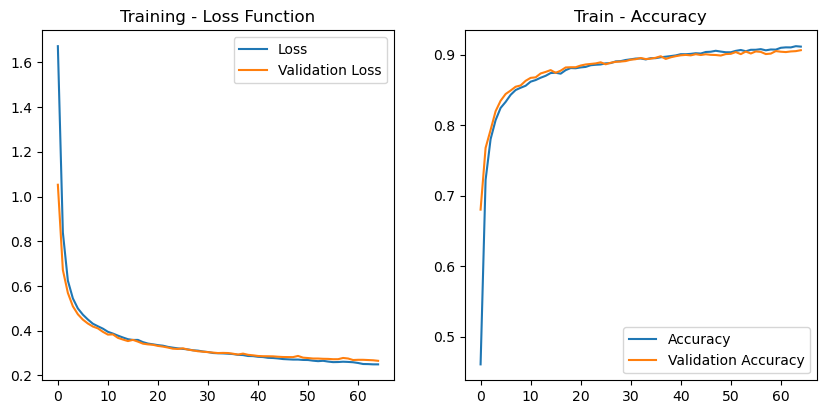

In [20]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

- #### Evaluate /Score the model

In [21]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2618
Test Accuracy : 0.9086


### Results




Let's plot training and validation accuracy as well as loss.

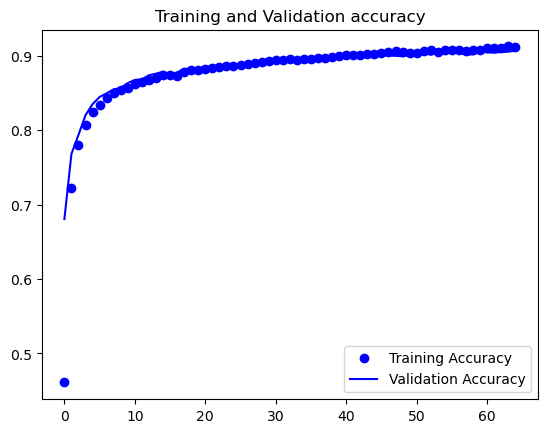

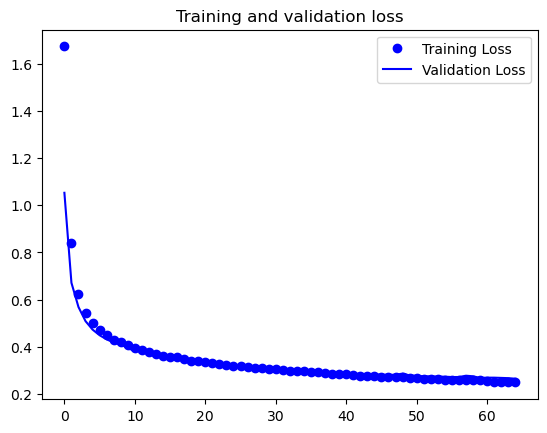

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Classification Report
We can summarize the performance of our classifier as follows

In [23]:
#np.shape(x_test)

In [24]:
#np.shape(y_true)

In [25]:
#np.shape(predicted_classes)

In [26]:
import numpy as np
from sklearn.metrics import classification_report

# Get the predicted probabilities for each class
predicted_probabilities = cnn_model.predict(x_test)

# Get the predicted class labels by finding the index of the highest probability
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Convert the y_true DataFrame column to a NumPy array
y_true = test_df.iloc[:, 0].values

# Get the indices to be plotted
correct = np.nonzero(predicted_classes == y_true)[0]
incorrect = np.nonzero(predicted_classes != y_true)[0]

target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))


313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

     Class 0       0.82      0.88      0.85      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.88      0.85      0.86      1000
     Class 3       0.92      0.92      0.92      1000
     Class 4       0.87      0.89      0.88      1000
     Class 5       0.98      0.96      0.97      1000
     Class 6       0.76      0.71      0.73      1000
     Class 7       0.94      0.96      0.95      1000
     Class 8       0.97      0.98      0.98      1000
     Class 9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



It's apparent that our classifier is underperforming for class 6 in terms of both precision and recall. For class 2, classifier is slightly lacking precision whereas it is slightly lacking recall (i.e. missed) for class 4.

Perhaps we would gain more insight after visualizing the correct and incorrect predictions.

Let us examine the test label and check if it the right classification or not.

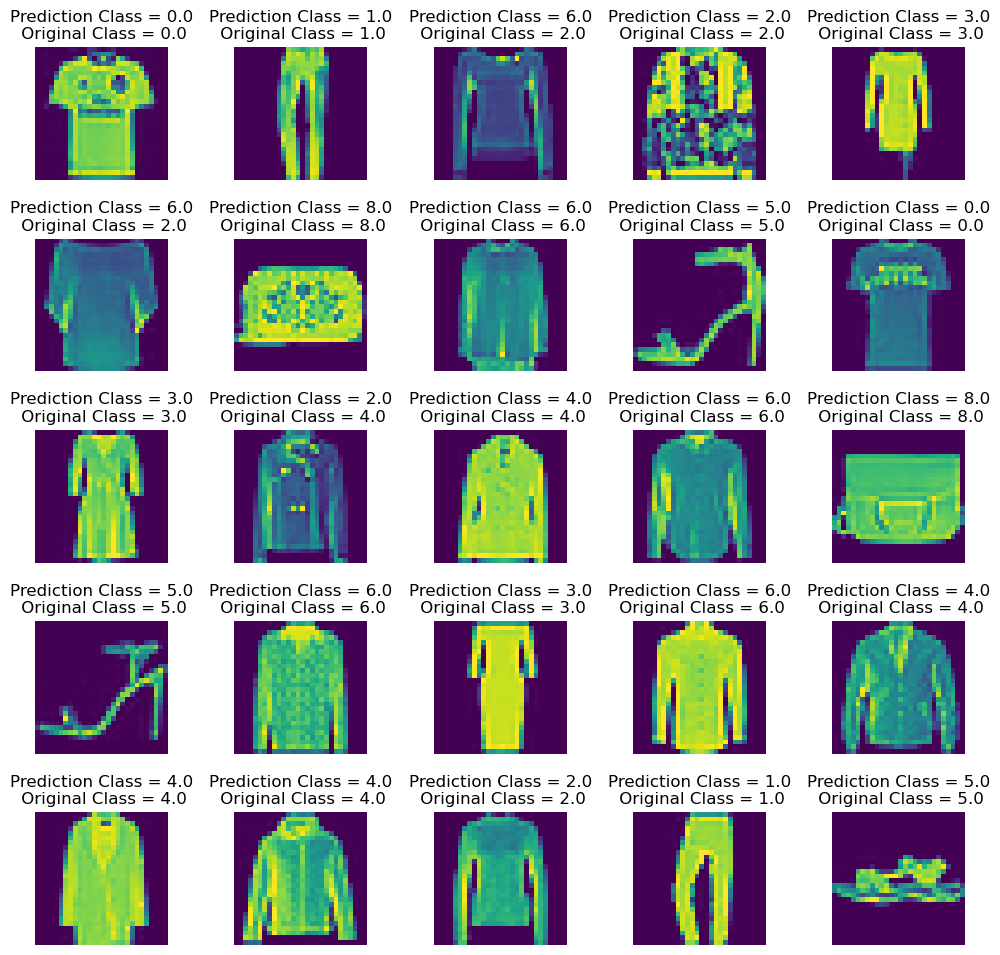

In [27]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)